In [1]:
#importing 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [11]:
#load training and testing data mnist
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train=x_train/255
x_test=x_test/255

In [4]:
x_train=x_train[0]
img_len,img_width=x_train.shape
print('size of input image:',img_len,'x',img_width)

size of input image: 28 x 28


In [12]:
#c define network architecture using keras
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
#train model using sgd
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 29.6320 - accuracy: 0.2142 - val_loss: 1.9403 - val_accuracy: 0.2785
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0762 - accuracy: 0.2262 - val_loss: 2.1554 - val_accuracy: 0.1801
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0433 - accuracy: 0.2360 - val_loss: 2.0783 - val_accuracy: 0.1962
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9825 - accuracy: 0.2571 - val_loss: 1.8556 - val_accuracy: 0.2853
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8910 - accuracy: 0.2903 - val_loss: 2.5271 - val_accuracy: 0.3004


In [14]:
#evaluate network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.5271 - accuracy: 0.3004
Loss=2.527
Accuracy=0.300


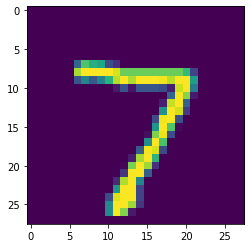

313/313 [==============================] - 1s 2ms/step


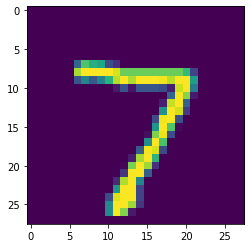

predicted value: [0.         0.         0.         0.         0.         0.
 0.         0.99999994 0.         0.        ]


In [20]:
n=random.randint(0,9999)
plt.imshow(x_test[0])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[0])
plt.show()
print("predicted value:",predicted_value[0])

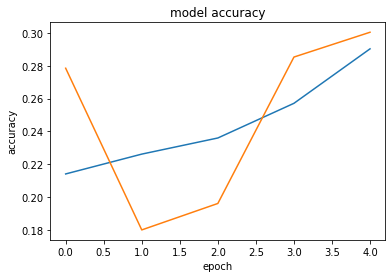

In [17]:
#trainning loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()